<a href="https://colab.research.google.com/github/Seifeddine-amara/Projet_CNN/blob/main/seifeddine-amara-cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!echo "Downloading files..."
!wget -q https://github.com/Seifeddine-amara/Projet_CNN/raw/main/training1.zip
!wget -q https://github.com/Seifeddine-amara/Projet_CNN/raw/main/training2.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test_partial.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test_classes_partial.csv

!echo "Unzipping files..."
!unzip -q /content/training1.zip
!unzip -q /content/training2.zip
!unzip -q /content/test_partial.zip


!echo "Mergining training data..."
!mkdir /content/training
!mv /content/training1/* /content/training
!mv /content/training2/* /content/training


!echo "Cleaning up..."
!rmdir /content/training1
!rmdir /content/training2
!rm training1.zip
!rm training2.zip
!rm test_partial.zip

!echo "Data ready."

Unzipping files...
Mergining training data...
Cleaning up...
Data ready.


In [2]:

import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [3]:

from tensorflow.keras.preprocessing import image_dataset_from_directory


training_dir = '/content/training/'
image_size = (100, 100)


training_data = image_dataset_from_directory(training_dir, validation_split=.2, subset='training', seed=42, image_size=image_size)
validation_data = image_dataset_from_directory(training_dir, validation_split=.2, subset='validation', seed=42, image_size=image_size)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


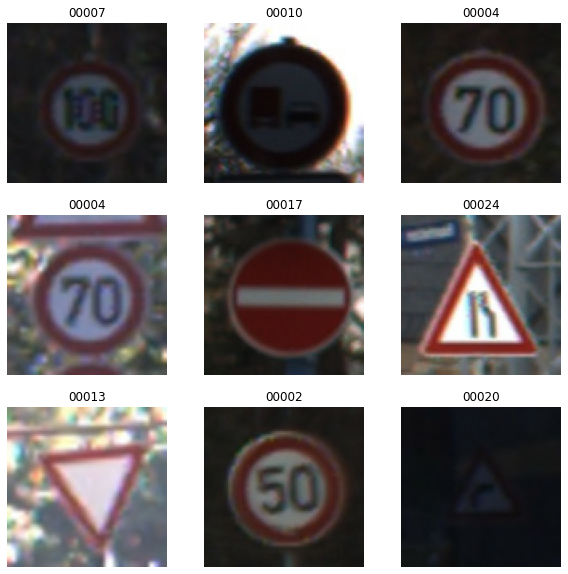

In [4]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, labels in training_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(training_data.class_names[labels[i]])
    plt.axis("off")

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = training_data.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = validation_data.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
train_ds

<PrefetchDataset shapes: ((None, 100, 100, 3), (None,)), types: (tf.float32, tf.int32)>

In [7]:
from tensorflow.keras import layers

num_classes = 43

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  tf.keras.layers.Dropout(.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [8]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [9]:
model.build((None, 100, 100, 3))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        9

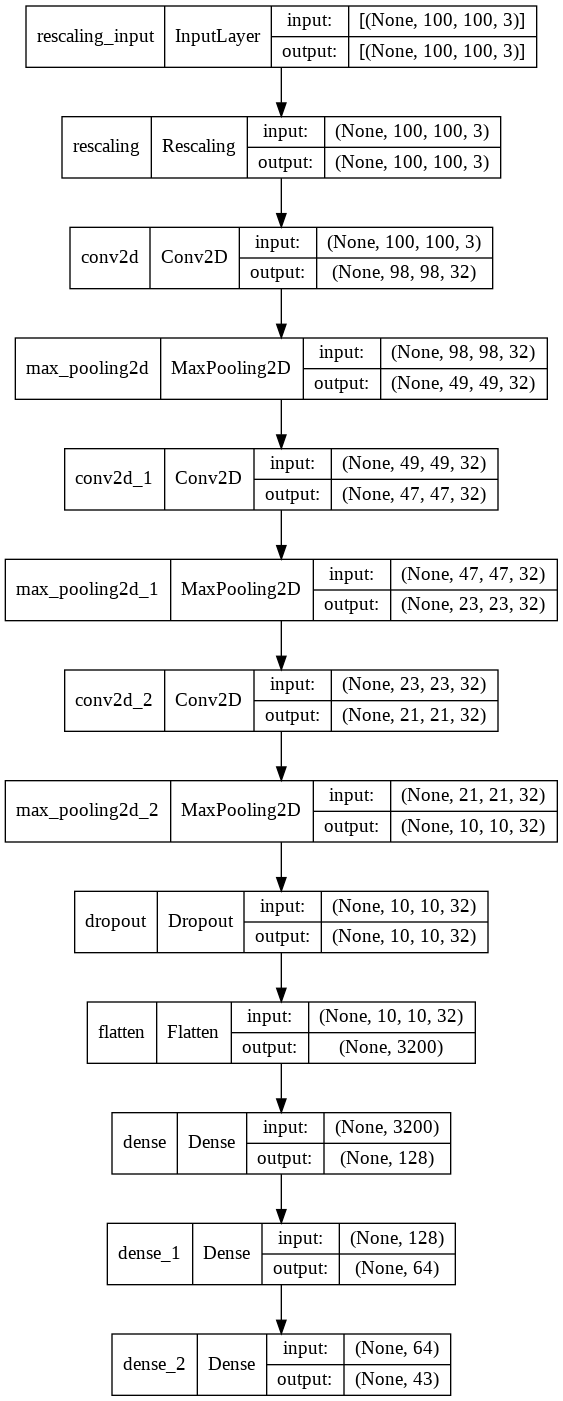

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True,to_file="model.png")

In [12]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

981/981 [==============================] - 391s 398ms/step - loss: 1.0662 - accuracy: 0.7010 - val_loss: 0.2169 - val_accuracy: 0.9434


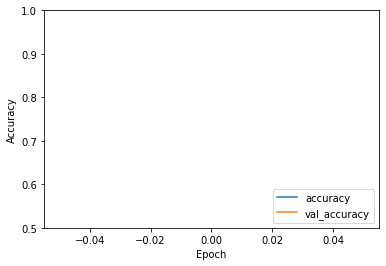

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [17]:
import pathlib
import numpy as np

testdir = pathlib.Path('/content/test_partial')
image_paths = list(testdir.glob('*.jpg'))

print(image_paths)

img = keras.preprocessing.image.load_img(image_paths[0], target_size=(100, 100))

# Get the image into the shape we need for our network
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

# Predict the class
predictions = model.predict(img_array)
print(predictions)

[PosixPath('/content/test_partial/00057.jpg'), PosixPath('/content/test_partial/00177.jpg'), PosixPath('/content/test_partial/00137.jpg'), PosixPath('/content/test_partial/00164.jpg'), PosixPath('/content/test_partial/00028.jpg'), PosixPath('/content/test_partial/00035.jpg'), PosixPath('/content/test_partial/00180.jpg'), PosixPath('/content/test_partial/00040.jpg'), PosixPath('/content/test_partial/00074.jpg'), PosixPath('/content/test_partial/00143.jpg'), PosixPath('/content/test_partial/00013.jpg'), PosixPath('/content/test_partial/00128.jpg'), PosixPath('/content/test_partial/00146.jpg'), PosixPath('/content/test_partial/00083.jpg'), PosixPath('/content/test_partial/00094.jpg'), PosixPath('/content/test_partial/00071.jpg'), PosixPath('/content/test_partial/00015.jpg'), PosixPath('/content/test_partial/00070.jpg'), PosixPath('/content/test_partial/00116.jpg'), PosixPath('/content/test_partial/00100.jpg'), PosixPath('/content/test_partial/00188.jpg'), PosixPath('/content/test_partial/

In [21]:
def predict_an_image(model, file_path):
    # Load the image
    img = keras.preprocessing.image.load_img(file_path, target_size=(100, 100))
 
    # Get the image into the shape we need for our network
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) 
 
    # Predict the class
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    return np.argmax(score)
 
# Loop through all images in our test directory and make
# a prediction
testdir = pathlib.Path('/content/test_partial')
image_paths = list(testdir.glob('*.jpg'))
for image_path in image_paths:
    prediction = predict_an_image(model, str(image_path))
    print(image_path, prediction)

/content/test_partial/00057.jpg 26
/content/test_partial/00177.jpg 40
/content/test_partial/00137.jpg 40
/content/test_partial/00164.jpg 18
/content/test_partial/00028.jpg 10
/content/test_partial/00035.jpg 17
/content/test_partial/00180.jpg 8
/content/test_partial/00040.jpg 7
/content/test_partial/00074.jpg 5
/content/test_partial/00143.jpg 26
/content/test_partial/00013.jpg 8
/content/test_partial/00128.jpg 1
/content/test_partial/00146.jpg 2
/content/test_partial/00083.jpg 8
/content/test_partial/00094.jpg 12
/content/test_partial/00071.jpg 25
/content/test_partial/00015.jpg 9
/content/test_partial/00070.jpg 11
/content/test_partial/00116.jpg 27
/content/test_partial/00100.jpg 1
/content/test_partial/00188.jpg 10
/content/test_partial/00189.jpg 8
/content/test_partial/00073.jpg 35
/content/test_partial/00018.jpg 11
/content/test_partial/00053.jpg 9
/content/test_partial/00097.jpg 38
/content/test_partial/00061.jpg 10
/content/test_partial/00140.jpg 9
/content/test_partial/00115.jpg 

In [22]:
import pathlib

realSigns = pd.read_csv("/content/test_classes_partial.csv")

def predict_an_image(model, file_path):
  # Load the image
  img = keras.preprocessing.image.load_img(file_path, target_size=(100, 100))
  
  # Get the image into the shape we need for our network
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) 
  # Predict the class
  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  return np.argmax(score)


def get_row_prediction(row):
  return predict_an_image(model, '/content/test_partial/' + row['Filename'])


realSigns['predictedSign'] = realSigns.apply(get_row_prediction, axis=1)




In [23]:
realSigns

,Filename,ClassId,predictedSign
0,00000.jpg,16,16
1,00001.jpg,1,1
2,00002.jpg,38,38
3,00003.jpg,33,33
4,00004.jpg,11,11
...,...,...,...
196,00196.jpg,8,8
197,00197.jpg,38,13
198,00198.jpg,18,11
199,00199.jpg,28,28


In [26]:
import pathlib
def predict_an_image(model, file_path):
  # Load the image
  img = keras.preprocessing.image.load_img(file_path, target_size=(100, 100))
  # Get the image into the shape we need for our network
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) 
  # Predict the class
  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  return np.argmax(score)
# Loop through all images in our test directory and make
# a prediction then put it into a Dataframe.
def get_row_prediction(row):
  return predict_an_image(model, '/content/test_partial/' + row['Filename'])
realSigns['predictedSign'] = realSigns.apply(get_row_prediction, axis=1)
realSigns['bin_crnn'] = (realSigns['predictedSign']==realSigns['ClassId']).astype(int)
sum(realSigns["bin_crnn"])/len(realSigns)


0.8507462686567164

In [27]:
!pip install coremltools
import coremltools as ct
ct.convert(model).save('model')

Translating MIL ==> NeuralNetwork Ops: 100%|██████████| 64/64 [00:00<00:00, 680.37 ops/s]
